In [3]:
import base64
import mimetypes
import os
import urllib.parse
import urllib.request


class EliceUtils(object):

    def __init__(self):
        self._execution_token = os.getenv('EXECUTION_TOKEN')
        self._executor_ip = os.getenv('EXECUTOR_IP')
        self._executor_com_port = os.getenv('EXECUTOR_COM_PORT')
        self._otp_key = None

        self._local_mode = False

        if not all((self._execution_token, self._executor_ip, self._executor_com_port)):
            self._local_mode = True

            print('=== NON-ELICE ENVIRONMENT ===')
            print('Warning: This script is running on the non-elice environment. '
                  'All outputs will be redirected to standard output.')
            print('=============================')

    def _send(self, url, data):
        if self._local_mode:
            msg_type = data['type']
            msg_data = data['data']

            if msg_type in ['grader', 'score']:
                print('[%s] %s' % (msg_type, msg_data), end='')
            else:
                print('[%s]' % msg_type, end='')

            return

        data_encoded = urllib.parse.urlencode(data)
        q = urllib.request.Request(url,
                                   data=data_encoded.encode('utf-8'))

        try:
            urllib.request.urlopen(q)
        except Exception:
            raise Exception('Failed to send message to elice.')

    def _handle_image(self, filepath):
        mtype, _ = mimetypes.guess_type(filepath)

        if mtype is None or not mtype.startswith('image/'):
            raise ValueError('Invalid image filepath.')

        with open(filepath, 'rb') as f:
            data = 'data:%s;base64,%s' % (
                mtype,
                base64.b64encode(f.read()).decode('utf-8')
            )

        return data

    def _handle_file(self, filepath):
        mtype, _ = mimetypes.guess_type(filepath)

        with open(filepath, 'rb') as f:
            data = '%s;data:%s;base64,%s' % (
                os.path.basename(filepath),
                mtype or 'application/octet-stream',
                base64.b64encode(f.read()).decode('utf-8')
            )

        return data

    def send(self, msg_type, msg_data):
        self._send(
            'http://%s:%s/comm/send/%s' % (self._executor_ip,
                                           self._executor_com_port,
                                           self._execution_token),
            {'type': msg_type, 'data': msg_data}
        )

    def send_image(self, filepath):
        self.send('image', self._handle_image(filepath))

    def send_file(self, filepath):
        self.send('file', self._handle_file(filepath))

    def secure_init(self):
        if self._local_mode:
            return

        try:
            r = urllib.request.urlopen(
                'http://%s:%s/comm/secure/init/%s' % (self._executor_ip,
                                                      self._executor_com_port,
                                                      self._execution_token)
            )
        except Exception:
            raise Exception('Failed to initialize elice util secure channel.')

        self._otp_key = r.read().decode('utf-8')

    def secure_send(self, msg_type, msg_data):
        self._send(
            'http://%s:%s/comm/secure/send/%s/%s' % (self._executor_ip,
                                                     self._executor_com_port,
                                                     self._execution_token,
                                                     self._otp_key),
            {'type': msg_type, 'data': msg_data}
        )

    def secure_send_image(self, filepath):
        self.secure_send('image', self._handle_image(filepath))

    def secure_send_file(self, filepath):
        self.secure_send('file', self._handle_file(filepath))

    def secure_send_grader(self, msg):
        self.secure_send('grader', msg)

    def secure_send_score(self, score):
        self.secure_send('score', score)


=== NON-ELICE ENVIRONMENT ===
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 512)               1067008   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 513       
Total params: 1,067,521
Trainable params: 1,067,521
Non-trainable params: 0
_________________________________________________________________
Train on 63 samples
Epoch 1/100
63/63 [==============================] - 1s 8ms/sample - loss: 0.1944 - mean_absolute_error: 0.4060 - mean_absolute_percentage_error: 285359.5625
Epoch 2/100
63/63 [==============================] - 0s 222us/sample - loss: 0.1017 - m

Epoch 44/100
63/63 [==============================] - 0s 317us/sample - loss: 0.0015 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 6188.5444
Epoch 45/100
63/63 [==============================] - 0s 301us/sample - loss: 0.0015 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 175740.5781
Epoch 46/100
63/63 [==============================] - 0s 237us/sample - loss: 0.0017 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 187599.1719
Epoch 47/100
63/63 [==============================] - 0s 332us/sample - loss: 0.0016 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 123552.6562
Epoch 48/100
63/63 [==============================] - 0s 396us/sample - loss: 0.0015 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 96356.1719
Epoch 49/100
63/63 [==============================] - 0s 253us/sample - loss: 0.0015 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 276415.4062
Epoch 50/100
63/63 [=================

Epoch 95/100
63/63 [==============================] - 0s 222us/sample - loss: 0.0015 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 680576.4375
Epoch 96/100
63/63 [==============================] - 0s 206us/sample - loss: 0.0017 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 309471.7812
Epoch 97/100
63/63 [==============================] - 0s 206us/sample - loss: 0.0016 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 788607.5625
Epoch 98/100
63/63 [==============================] - 0s 206us/sample - loss: 0.0014 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 222405.5469
Epoch 99/100
63/63 [==============================] - 0s 206us/sample - loss: 0.0014 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 705414.1875
Epoch 100/100
63/63 [==============================] - 0s 206us/sample - loss: 0.0012 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 366336.2500
[image][image][image]

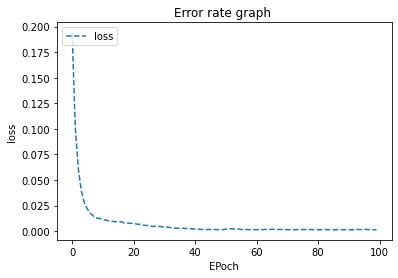

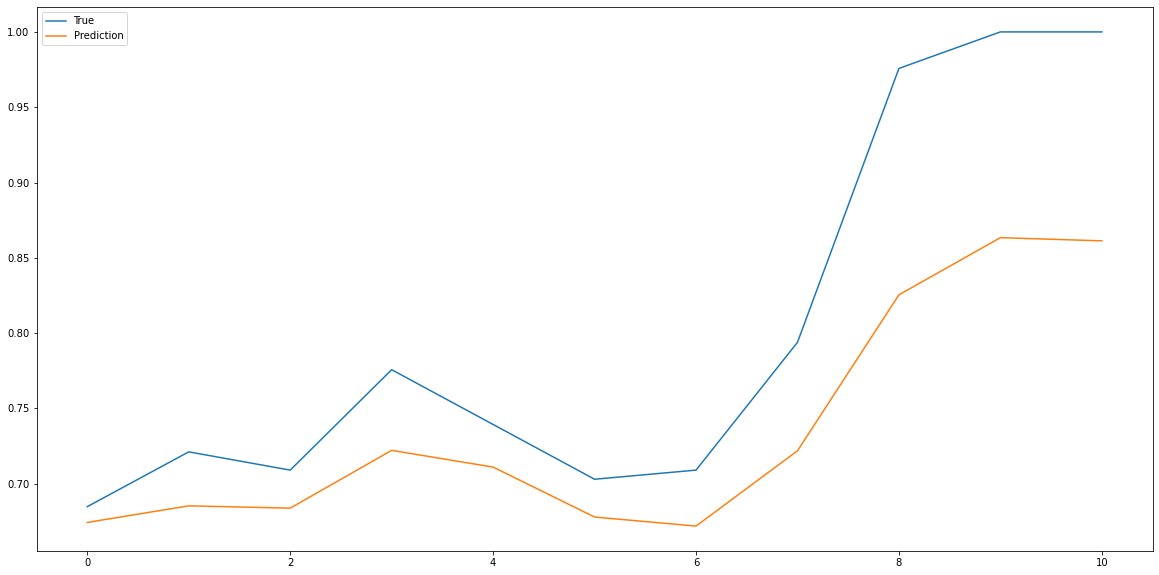

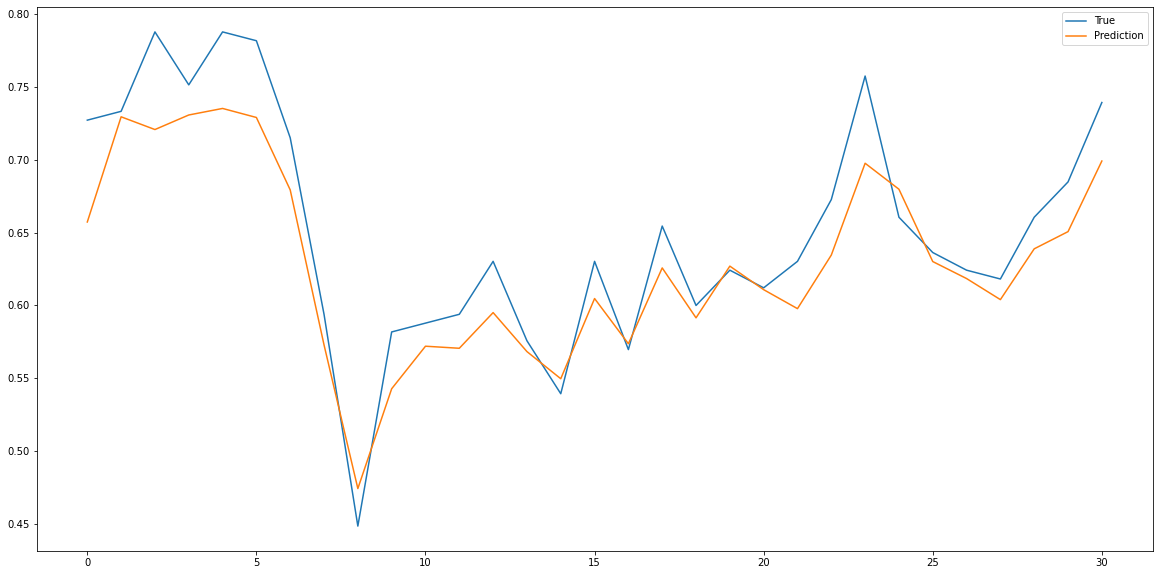

In [4]:
from datetime import datetime #날짜와 시간을 쉽게 조작할 수 있게 하는 클래스 제공
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, SimpleRNN
from tensorflow.keras.layers import LSTM

elice_utils = EliceUtils()



def main():
    """
    주식 데이터 불러오기
    """
    df = pd.read_csv('stock.csv') 
    
    # 데이터 프레임 기본 형 출력
    # row X columns로 이루어진 table 모양
    
    """
    딥러닝의 입력피쳐 설계
    """
    #가격의 중간값 계산하기
    high_prices = df['High'].values
    low_prices = df['Low'].values
    mid_prices = (high_prices + low_prices) / 2
    mid_prices
    
    #중간 값 요소 추가하기
    df['Mid'] = mid_prices
    
    #이동평균값 계산하기
    ma5 = df['Adj Close'].rolling(window=5).mean()
    df['MA5'] = ma5
    df = df.fillna(0) #결측값(NaN을 0으로 모두 치환)
    
    """
    데이터 전처리
    """
    # Date 변수를 제거합니다.
    df = df.drop('Date', axis = 1)
    
    #데이터 스케일링 (preprocessing)
    min_max_scaler = MinMaxScaler()
    fitted = min_max_scaler.fit(df)

    output = min_max_scaler.transform(df)
    output = pd.DataFrame(output, columns=df.columns, index=list(df.index.values))
    
    """
    데이터 셋 나누기
    """
    #train/test size 설정
    train_size = int(len(output)* 0.6)
    test_size = int(len(output)*0.3) + train_size

    #train/test 학습 및 라벨 설정#종가를 예측하기 위해 종가를 label로 설정
    train_x = np.array(output[:train_size])
    train_y = np.array(output['Close'][:train_size])
    test_x =np.array(output[train_size:test_size])
    test_y = np.array(output['Close'][train_size:test_size])
    validation_x = np.array(output[test_size:])
    validation_y = np.array(output['Close'][test_size:])
    
    
    """
    LSTM 적용하기
    """
    # 학습을 위한 기초 파라메터 설정
    learning_rate = 0.01
    # 전체 데이터셋에 대한 반복 학습 횟수 (Epoch)
    training_cnt = 100
    #한번 학습에 사용할 batch size
    batch_size =  200
    #입력 피쳐의 개수
    input_size = train_x.shape[1]

    time_step = 1

    # reshape into (size(개수), time step, 입력 feature)
    train_x = train_x.reshape(train_x.shape[0], time_step, input_size)
    validation_x = validation_x.reshape(validation_x.shape[0], time_step, input_size)
    test_x = test_x.reshape(test_x.shape[0], time_step, input_size)

    model = Sequential()

    #cell의 개수와 입력 될 데이터의 shape 설정
    model.add(LSTM(512, input_shape=(1,input_size)))

    #Overfitting을 방지하기 위해 Dropout 설정
    model.add(Dropout(0.2))

    #output(target)은 '종가'이기 때문에 1요소 = Dense의 output레이어는 1로 설정
    model.add(Dense(1, activation='tanh'))

    #오차 및 최적화기 설정
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae', 'mape'])
    model.summary()

    #학습
    history = model.fit(train_x, train_y, epochs=training_cnt, \
                        batch_size=batch_size, verbose=1)
    val_mse, val_mae, val_mape = model.evaluate(test_x, test_y, verbose=0)
    
    
    plt.title('Error rate graph ')
    plt.plot(history.history['loss'], linestyle='--')
    plt.legend(['loss'], loc='upper left')
    plt.ylabel('loss')
    plt.xlabel('EPoch')

    # 현재까지 그려진 그래프를 보여줌
    plt.savefig("plot.png")
    elice_utils.send_image("plot.png")
    
    #학습이 잘 이루어졌는지 예측
    pred = model.predict(validation_x)

    fig = plt.figure(facecolor='white', figsize=(20, 10))
    ax = fig.add_subplot(111)
    ax.plot(validation_y, label='True')
    ax.plot(pred, label='Prediction')
    ax.legend()
    
    # 현재까지 그려진 그래프를 보여줌
    plt.savefig("plot.png")
    elice_utils.send_image("plot.png")
    
    
    pred = model.predict(test_x)

    fig = plt.figure(facecolor='white', figsize=(20, 10))
    ax = fig.add_subplot(111)
    ax.plot(test_y, label='True')
    ax.plot(pred, label='Prediction')
    ax.legend()
    
    # 현재까지 그려진 그래프를 보여줌
    plt.savefig("plot.png")
    elice_utils.send_image("plot.png")
    
    
    
if __name__ == '__main__':
    main()